# Guided Practice/Demo

The following code samples are provided directly from the lesson and should serve as a jumping off point for students to run the code on their own.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1 #replacing the first 20 observations with 1 to introduce bias
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print (metrics.mean_squared_error(df['y'], lm.predict(df[['x']])))

## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print (metrics.mean_squared_error(df['y'], lm.predict(df[['x']])))

0.163676401504
0.164278423288


In [2]:
from sklearn import cross_validation
wd = 'C:/Users/BeckyC/Desktop/Data Science - GA files/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True) # shuffle = shuffle data before folding.
scores = []
for train_index, test_index in kf:
    ## Model built using the training set
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index]) 
    ##Predictions made on the test set
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index]))) 

print ('with folds:',np.mean(scores))

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print ('without folds:',metrics.mean_squared_error(y, lm.predict(modeldata)))

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


with folds: 1673.452821
without folds: 1672.58110765


Observations: MSE is higher where we use folds, this is because the model is more generalised and less fitted to the training set. Without folds will work well on the training set, but is likely to have more variance when applied to a new data set.

In [6]:
# printing out MSE based on diffrent CV k-folds
for i in range (2,20,1):# range(2,51,2) a list of even numbers from 2 to 50.
    kf = cross_validation.KFold(len(modeldata), n_folds=i)
    scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    print (np.mean(scores))

223.426492943
535.923344731
702.752527427
927.532396262
1110.50225616
1260.12739988
1272.11688811
1272.81913174
1185.0613224
1102.88961636
1060.61095283
1247.39121248
1383.8987848
1553.99974663
1599.68455817
1634.58310878
1741.04985867
1780.05613652
1714.26252611


In [12]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print (metrics.mean_squared_error(y, lm.predict(modeldata)))

lm = linear_model.Lasso().fit(modeldata, y) #LASSO
print (metrics.mean_squared_error(y, lm.predict(modeldata)))

lm = linear_model.Ridge().fit(modeldata, y) #RIDGE
print (metrics.mean_squared_error(y, lm.predict(modeldata)))

1672.58110765
1725.41581608
1672.60490113


In [27]:
## this creates a range of values which we will add to the model to increase the error/ increase the generalisation
alphas = np.logspace(-10, 2, 13)
for a in alphas:
    print ('Alpha:', format(a,'.65f')) # this format removes the scientific notation
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print (lm.coef_)
    print (metrics.mean_squared_error(y, lm.predict(modeldata)))
    

Alpha: 0.00000000010000000000000000364321973154977415791655470655996396090
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 0.00000000100000000000000006228159145777985641889706869278597878292
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 0.00000001000000000000000020922560830128472675326634089287836104631
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 0.00000009999999999999999547481118258862586856139387236908078193665
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 0.00000099999999999999995474811182588625868561393872369080781936646
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 0.00001000000000000000081803053914031309545862313825637102127075195
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001000000000000000047921

Observations:
As alpha increases it's applying a larger coefficient to each feature, which means that it's adding more bias.
A larger MSE = more error 
You would pick the alpha which introduces a bit more generalisation but not too much (relative to the test MSE) 
In this example, 
When alpha = 0, MSE = 1672
When alpha = 100, MSE = 1686
when alpha =1000, MSE = 1937
when alpha =10000, MSE = 2314

So an alpha of 100 introduces so bias, but not so much that the model is too generalised - this is how it was explained, but not sure if it should be more scientific.

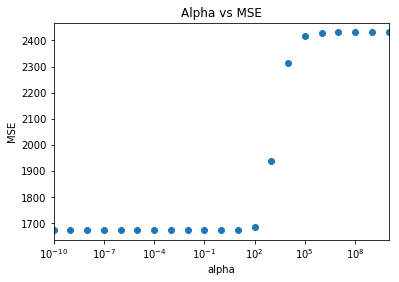

In [13]:
#From Colin: this is the code for creating a loop and plotting the resulting MSEs for each Alpha  
#Matplotlib can be a bit tempermental with Log scales

import matplotlib.pyplot as plt
%matplotlib inline
alphas = np.logspace(-10, 10, 21)
results=[]
for a in alphas:
    #print ('Alpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    #print (lm.coef_)
    #print (metrics.mean_squared_error(y, lm.predict(modeldata)))
    results.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
    
plt.scatter(x=alphas,y=results)
plt.xlim(10**(-10),10**10)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Alpha vs MSE')


Observation:
Using the graph above, we can see at 10^2 onwards the MSE is too large.

Using this graph we would reduce the range of alphas, the alpha at the bottom of the trough would be the optimum.
In this data set that is c.10, but Colin says that the trough is often more prominent in 'real data'.

In [14]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

print (-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print (gs.best_estimator_ )# explains which combination worked best
print (gs.grid_scores_) # shows all the grid pairings and their performances.

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0

1814.0936913337962
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, par

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0

In [7]:
##Gradient descent
##This is just an example of how gradient descent works...
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False #6.2 is the number we want to reach, it's made up!
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps] #starts with 0, compares to 0-1 and 0+1, keeps 0+1 as this is closer to 6.2.
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


In [31]:
# SGDRegressor stocastic gradient descent 
lm = linear_model.SGDRegressor() # Using this model will fit different alphas until it finds the best solution 
                                 # use this instead of linear, ridge or lasso
lm.fit(modeldata, y) ## create the model
print ("This is the alpha:", lm.score(modeldata, y)) ## score the data 
print ("This is the MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))) ## calculate the MSE

This is the alpha: 0.308052940003
This is the MSE: 1682.01684044


# Independent Practice

Use the following code to work through the problems given.


1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [19]:
alphas = np.logspace(-10, 10, 10)
params = {'alpha':alphas} # {} denotes a dictionary

gs = grid_search.GridSearchCV( # gridsearch cross validation goes through every combination of the inputs  
                               # in this case, for each of the 5 folds go through 12 alphas using the lasso 'estimator' = 60 combos
    estimator=linear_model.Lasso(), 
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True), #CV defines the splitting strategy, integer
    param_grid=params, # this has to be a dictionary 
    scoring='mean_squared_error', # if none the score method of the estimator is used.
    )

gs.fit(modeldata, y)

print ('BEST ESTIMATOR')
print (-gs.best_score_) #prints the best MSE for the TEST set, best_score_, best_estimator_ and  grid_scores_ are outputs from gridsearchCV
print (gs.best_estimator_) #prints the estimator and details, confirms Lasso and alpha value
print ('ALL ESTIMATORS') 
for row in gs.grid_scores_: # returns params and statistics for all combinations 
    print (row)  



C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring 

BEST ESTIMATOR
1673.259990654079
Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
ALL ESTIMATORS
mean: -1673.25999, std: 96.25276, params: {'alpha': 1e-10}
mean: -1673.25999, std: 96.25276, params: {'alpha': 1.6681005372000592e-08}
mean: -1673.26009, std: 96.25281, params: {'alpha': 2.782559402207126e-06}
mean: -1673.28010, std: 96.26230, params: {'alpha': 0.00046415888336127822}
mean: -1673.74791, std: 96.43648, params: {'alpha': 0.077426368268112777}
mean: -2430.90056, std: 117.14313, params: {'alpha': 12.915496650148826}
mean: -2430.90056, std: 117.14313, params: {'alpha': 2154.4346900318865}
mean: -2430.90056, std: 117.14313, params: {'alpha': 359381.36638046405}
mean: -2430.90056, std: 117.14313, params: {'alpha': 59948425.031894207}
mean: -2430.90056, std: 117.14313, params: {'alpha': 10000000000.0}


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
#Can I plot the results?
plt.plot([a[3] for a in gs.grid_scores_],[s[1] for s in gs.grid_scores_],) # even rows = uniform / [0::2]
gs.grid_scores_

IndexError: tuple index out of range